<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/7%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature Scaling

In [45]:
from sklearn.datasets import load_wine, load_breast_cancer

In [46]:
data1 = load_wine(as_frame=True)

In [47]:
wine = data1.frame

In [48]:
data2 = load_breast_cancer(as_frame=True)

In [49]:
breast = data2.frame

In [50]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [51]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<Axes: >

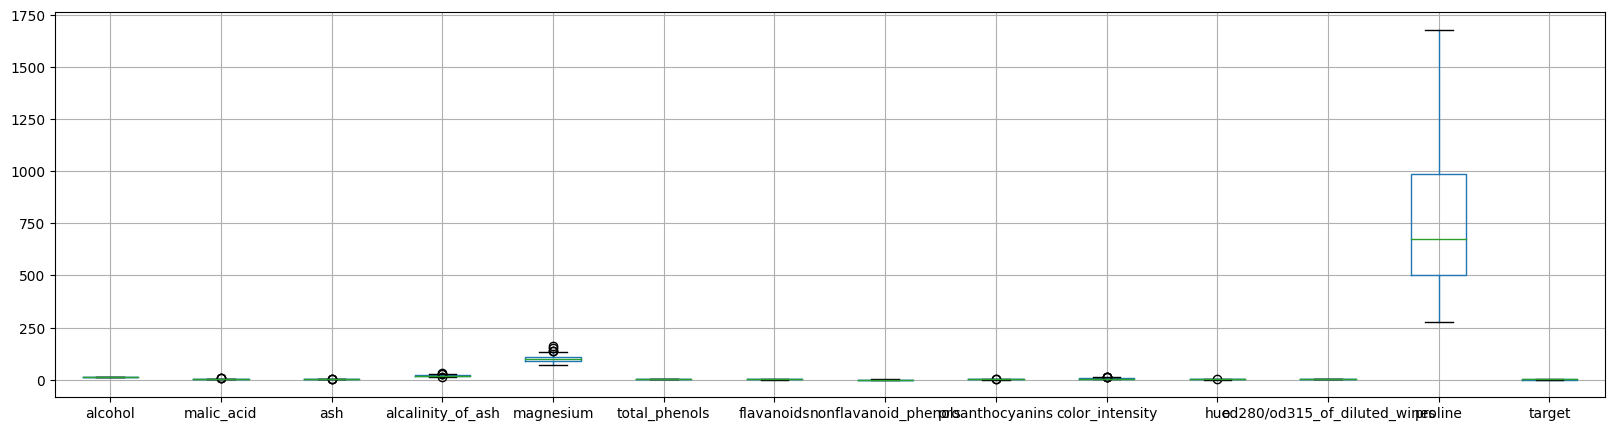

In [52]:
wine.boxplot(figsize=(20,5))

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
cross_val_score(KNeighborsClassifier(), wine.iloc[:,:-1], wine.target, cv=10)

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

In [130]:
wine.proline.std()

314.9074742768491

In [131]:
wine.proline.mean()

746.8932584269663

#standard scaler

In [56]:
wine['proline'] = wine.proline.map(lambda x: (x-wine.proline.mean())/wine.proline.std())

In [57]:
cross_val_score(KNeighborsClassifier(), wine.iloc[:,:-1], wine.target, cv=10)   #=> 편차는 크지만 성능이 올라감

array([0.72222222, 0.94444444, 0.72222222, 0.94444444, 0.88888889,
       0.94444444, 0.72222222, 1.        , 0.82352941, 0.82352941])

In [58]:
wine['proline'] = wine.proline.map(lambda x: (x-wine.proline.min()/(wine.proline.max()-x-wine.proline.min())))

In [59]:
cross_val_score(KNeighborsClassifier(), wine.iloc[:,:-1], wine.target, cv=10)

array([0.72222222, 0.94444444, 0.77777778, 0.94444444, 0.88888889,
       0.94444444, 0.72222222, 1.        , 0.82352941, 0.82352941])

#minmax scaler

In [132]:
from sklearn.datasets import load_wine, load_breast_cancer

In [133]:
data1 = load_wine(as_frame=True)

In [134]:
wine = data1.frame

In [135]:
wine.proline.max()

1680.0

In [136]:
wine.proline.min()

278.0

In [138]:
wine['proline'] = wine.proline.map(lambda x: (x-wine.proline.min()/(wine.proline.max()-x-wine.proline.min())))

In [139]:
cross_val_score(KNeighborsClassifier(), wine.iloc[:,:-1], wine.target, cv=10)

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

#minmax + standardscaler =>동시에 사용할 때 뒤 영향 단, 항상 똑같이 값 나오지 않음

In [67]:
wine['proline'] = wine.proline.map(lambda x: (x-wine.proline.mean())/wine.proline.std())

In [68]:
cross_val_score(KNeighborsClassifier(), wine.iloc[:,:-1], wine.target, cv=10)

array([0.72222222, 0.94444444, 0.72222222, 0.94444444, 0.88888889,
       0.94444444, 0.72222222, 1.        , 0.82352941, 0.82352941])

In [140]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler  #=> 아주 중요  데이터표현 공간을 변환시킴

In [141]:
mm = MinMaxScaler()

In [142]:
mm.fit_transform(wine[['proline']])

array([[0.56043036],
       [0.54976592],
       [0.6456212 ],
       [0.85930071],
       [0.3255524 ],
       [0.83950917],
       [0.71959174],
       [0.72307225],
       [0.54621064],
       [0.54621064],
       [0.87997417],
       [0.7126104 ],
       [0.74032358],
       [0.62080585],
       [0.9058735 ],
       [0.73345986],
       [0.7126104 ],
       [0.606611  ],
       [1.        ],
       [0.40388335],
       [0.35759939],
       [0.3504781 ],
       [0.53909943],
       [0.52487467],
       [0.40388335],
       [0.39320318],
       [0.65270342],
       [0.71610417],
       [0.45371652],
       [0.53909943],
       [0.71610417],
       [0.88345617],
       [0.50708992],
       [0.6809795 ],
       [0.58175189],
       [0.45727546],
       [0.42880165],
       [0.58885649],
       [0.52843114],
       [0.34335665],
       [0.36828101],
       [0.53909943],
       [0.58175189],
       [0.28638023],
       [0.43236114],
       [0.57109246],
       [0.56043036],
       [0.503

In [143]:
st = StandardScaler()

In [144]:
st.fit_transform(wine[['proline']])

array([[ 1.01277149],
       [ 0.96508295],
       [ 1.3937223 ],
       [ 2.34924033],
       [-0.03754034],
       [ 2.26073779],
       [ 1.72449891],
       [ 1.74006281],
       [ 0.94918467],
       [ 0.94918467],
       [ 2.44168653],
       [ 1.69328021],
       [ 1.81720619],
       [ 1.28275466],
       [ 2.55750146],
       [ 1.78651346],
       [ 1.69328021],
       [ 1.21927907],
       [ 2.97841016],
       [ 0.31273484],
       [ 0.10576526],
       [ 0.07392076],
       [ 0.91738525],
       [ 0.85377591],
       [ 0.31273484],
       [ 0.26497598],
       [ 1.42539212],
       [ 1.70890341],
       [ 0.53557553],
       [ 0.91738525],
       [ 1.70890341],
       [ 2.45725709],
       [ 0.77424721],
       [ 1.55183521],
       [ 1.10811573],
       [ 0.55149018],
       [ 0.42416285],
       [ 1.13988562],
       [ 0.86967947],
       [ 0.04207555],
       [ 0.15353063],
       [ 0.91738525],
       [ 1.10811573],
       [-0.2127079 ],
       [ 0.44007996],
       [ 1

In [145]:
ro = RobustScaler()   #=>   아웃라이어 있을 경우

In [146]:
ro.fit_transform(wine[['proline']])

array([[ 0.80773186],
       [ 0.7768218 ],
       [ 1.05465093],
       [ 1.67398449],
       [ 0.12695625],
       [ 1.61662022],
       [ 1.26904882],
       [ 1.2791368 ],
       [ 0.7665171 ],
       [ 0.7665171 ],
       [ 1.7339049 ],
       [ 1.24881395],
       [ 1.32913846],
       [ 0.98272556],
       [ 1.80897211],
       [ 1.3092445 ],
       [ 1.24881395],
       [ 0.94158289],
       [ 2.0817905 ],
       [ 0.35399244],
       [ 0.21984196],
       [ 0.19920146],
       [ 0.74590581],
       [ 0.70467645],
       [ 0.35399244],
       [ 0.32303681],
       [ 1.0751782 ],
       [ 1.25894037],
       [ 0.49843003],
       [ 0.74590581],
       [ 1.25894037],
       [ 1.7439972 ],
       [ 0.65312871],
       [ 1.15713422],
       [ 0.86953068],
       [ 0.50874535],
       [ 0.4262162 ],
       [ 0.89012282],
       [ 0.71498459],
       [ 0.1785605 ],
       [ 0.25080181],
       [ 0.74590581],
       [ 0.86953068],
       [ 0.01341873],
       [ 0.43653312],
       [ 0

## Filter, Wrapper, Embeded

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
dc = DecisionTreeClassifier()

In [149]:
dc.fit(wine.iloc[:,:-1], wine.target)

DecisionTreeClassifier()

In [150]:
from sklearn.tree import plot_tree

[Text(0.5657894736842105, 0.9166666666666666, 'x[12] <= 754.57\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'x[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'x[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'x[2] <= 2.45\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'x[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.42105

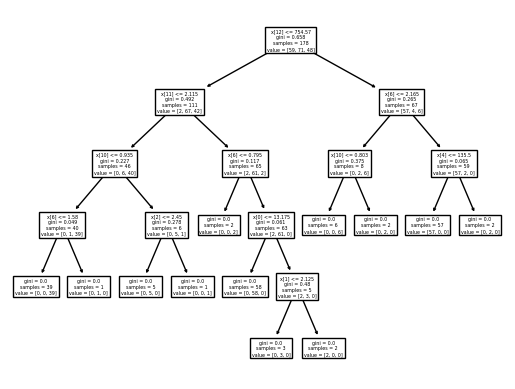

In [151]:
plot_tree(dc)

In [153]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [154]:
dc.feature_importances_

array([0.01257056, 0.02048135, 0.01422316, 0.        , 0.03297845,
       0.        , 0.14144668, 0.        , 0.        , 0.        ,
       0.08378678, 0.31204257, 0.38247045])

알고리즘 자체 feature를 선택할수 있다면 => 임베디드 방식

In [155]:
from sklearn.model_selection import cross_val_score

In [157]:
cross_val_score(DecisionTreeClassifier(), wine.iloc[:,:-1], wine.target, cv=10)

array([0.83333333, 0.88888889, 0.72222222, 0.88888889, 0.83333333,
       0.83333333, 1.        , 0.94444444, 0.94117647, 0.76470588])

In [158]:
cross_val_score(DecisionTreeClassifier(), wine.iloc[:,:-1], wine.target, cv=10).mean()

0.865032679738562

In [162]:
wine2 = wine[['proline','od280/od315_of_diluted_wines','flavanoids','hue','target']]

In [163]:
wine2

,proline,od280/od315_of_diluted_wines,flavanoids,hue,target
0,1064.175074,3.92,3.06,1.04,0
1,1049.210227,3.40,2.76,1.05,0
2,1183.718894,3.17,3.24,1.03,0
3,1483.564103,3.45,3.49,0.86,0
4,734.583208,2.93,2.69,1.04,0
...,...,...,...,...,...
173,739.580060,1.74,0.61,0.64,2
174,749.573620,1.56,0.75,0.70,2
175,834.509700,1.56,0.69,0.59,2
176,839.505338,1.62,0.68,0.60,2


In [164]:
cross_val_score(DecisionTreeClassifier(), wine2.iloc[:,:-1], wine2.target, cv=10).mean()

0.9163398692810457

==> overfitting이 줄어듬 (즉. 성능이 좋아짐) 평균값은 높힐수도 낮아질수도 있음

#Filter

In [101]:
from sklearn.feature_selection import SelectKBest, chi2

In [102]:
chi2    #=>카이제곱

<function sklearn.feature_selection._univariate_selection.chi2(X, y)>

In [103]:
ssb = SelectKBest(chi2, k=5)   #=>  카이제곱 점수 매겨 5개 골라

In [165]:
ssb.fit_transform(wine.iloc[:,:-1], wine.target)

array([[1.56000000e+01, 1.27000000e+02, 3.06000000e+00, 5.64000000e+00,
        1.06417507e+03],
       [1.12000000e+01, 1.00000000e+02, 2.76000000e+00, 4.38000000e+00,
        1.04921023e+03],
       [1.86000000e+01, 1.01000000e+02, 3.24000000e+00, 5.68000000e+00,
        1.18371889e+03],
       [1.68000000e+01, 1.13000000e+02, 3.49000000e+00, 7.80000000e+00,
        1.48356410e+03],
       [2.10000000e+01, 1.18000000e+02, 2.69000000e+00, 4.32000000e+00,
        7.34583208e+02],
       [1.52000000e+01, 1.12000000e+02, 3.39000000e+00, 6.75000000e+00,
        1.45579167e+03],
       [1.46000000e+01, 9.60000000e+01, 2.52000000e+00, 5.25000000e+00,
        1.28751786e+03],
       [1.76000000e+01, 1.21000000e+02, 2.51000000e+00, 5.05000000e+00,
        1.29240187e+03],
       [1.40000000e+01, 9.70000000e+01, 2.98000000e+00, 5.20000000e+00,
        1.04422129e+03],
       [1.60000000e+01, 9.80000000e+01, 3.15000000e+00, 7.22000000e+00,
        1.04422129e+03],
       [1.80000000e+01, 1.0500

In [166]:
vars(ssb)

{'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>,
 'k': 5,
 'feature_names_in_': array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
        'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
        'proanthocyanins', 'color_intensity', 'hue',
        'od280/od315_of_diluted_wines', 'proline'], dtype=object),
 'n_features_in_': 13,
 'scores_': array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
        4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
        9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
        1.65189015e+04]),
 'pvalues_': array([6.56938863e-02, 8.03489047e-07, 6.89567769e-01, 4.16304971e-07,
        1.66972759e-10, 4.05034646e-04, 1.76656548e-14, 4.03433989e-01,
        9.24066398e-03, 2.12488671e-24, 7.49248322e-02, 8.33587826e-06,
        0.00000000e+00])}

In [167]:
import numpy as np

In [168]:
ssb.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65189015e+04])

In [169]:
np.argmax(ssb.scores_)

12

In [170]:
np.argsort(ssb.scores_)[-5:]    #=> 가장 큰것 5개

array([ 3,  4,  6,  9, 12])

In [172]:
wine.columns[np.argsort(ssb.scores_)[-5:]]

Index(['alcalinity_of_ash', 'magnesium', 'flavanoids', 'color_intensity',
       'proline'],
      dtype='object')

In [173]:
wine3 = wine[wine.columns[np.argsort(ssb.scores_)[-5:]]]

In [174]:
wine3

,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
0,15.6,127.0,3.06,5.64,1064.175074
1,11.2,100.0,2.76,4.38,1049.210227
2,18.6,101.0,3.24,5.68,1183.718894
3,16.8,113.0,3.49,7.80,1483.564103
4,21.0,118.0,2.69,4.32,734.583208
...,...,...,...,...,...
173,20.5,95.0,0.61,7.70,739.580060
174,23.0,102.0,0.75,7.30,749.573620
175,20.0,120.0,0.69,10.20,834.509700
176,20.0,120.0,0.68,9.30,839.505338


In [175]:
cross_val_score(DecisionTreeClassifier(), wine3.iloc[:,:-1], wine.target, cv=10).mean()

0.9441176470588235

In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
cross_val_score(KNeighborsClassifier(), wine3.iloc[:,:-1], wine.target, cv=10).mean()

0.7761437908496731

In [178]:
cross_val_score(KNeighborsClassifier(), wine.iloc[:,:-1], wine.target, cv=10).mean()

0.6754901960784313

wine3 wine 성능
embedded 방식은 가지고 있는 알고리즘에 사용 cf.  filter방식 어떤 알고리즘에도 가능

## wapper 방식
sequential feature
Recursive feature

In [181]:
from sklearn.feature_selection import RFE, RFECV #=> crossvalidation 단점 모델이 크면클수록 시간이 많이 걸림

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
lr = LogisticRegression()

In [184]:
lr.fit(wine.iloc[:,:-1], wine.target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [185]:
lr.decision_function(wine.iloc[:,:-1])

array([[  4.56542056,  -1.94023644,  -2.62518412],
       [  5.99752637,  -2.73788442,  -3.25964195],
       [  5.39682621,  -3.72520612,  -1.67162009],
       [  8.28118884,  -8.12098909,  -0.16019975],
       [  0.27446598,   1.80652676,  -2.08099274],
       [  8.11146907,  -7.31286026,  -0.79860881],
       [  7.03779079,  -4.65384941,  -2.38394139],
       [  5.5769768 ,  -3.90641329,  -1.67056352],
       [  5.17397767,  -2.29898354,  -2.87499413],
       [  4.89386402,  -4.2176635 ,  -0.67620052],
       [  8.02599432,  -6.10137955,  -1.92461476],
       [  5.84371824,  -4.08860299,  -1.75511525],
       [  6.91388801,  -5.44734871,  -1.46653929],
       [  7.41084475,  -3.61656215,  -3.7942826 ],
       [ 10.34743746,  -9.43642731,  -0.91101015],
       [  6.04993865,  -7.00630084,   0.9563622 ],
       [  4.84183894,  -4.31488407,  -0.52695486],
       [  3.80467446,  -3.49692644,  -0.30774802],
       [  9.87224908, -11.10690317,   1.23465409],
       [  3.27111465,  -1.43484

In [192]:
rfe = RFE(LogisticRegression(), n_features_to_select=5)

In [193]:
rfe.fit_transform(wine.iloc[:,:-1], wine.target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([[14.23    ,  2.43    ,  3.06    ,  5.64    ,  3.92    ],
       [13.2     ,  2.14    ,  2.76    ,  4.38    ,  3.4     ],
       [13.16    ,  2.67    ,  3.24    ,  5.68    ,  3.17    ],
       [14.37    ,  2.5     ,  3.49    ,  7.8     ,  3.45    ],
       [13.24    ,  2.87    ,  2.69    ,  4.32    ,  2.93    ],
       [14.2     ,  2.45    ,  3.39    ,  6.75    ,  2.85    ],
       [14.39    ,  2.45    ,  2.52    ,  5.25    ,  3.58    ],
       [14.06    ,  2.61    ,  2.51    ,  5.05    ,  3.58    ],
       [14.83    ,  2.17    ,  2.98    ,  5.2     ,  2.85    ],
       [13.86    ,  2.27    ,  3.15    ,  7.22    ,  3.55    ],
       [14.1     ,  2.3     ,  3.32    ,  5.75    ,  3.17    ],
       [14.12    ,  2.32    ,  2.43    ,  5.      ,  2.82    ],
       [13.75    ,  2.41    ,  2.76    ,  5.6     ,  2.9     ],
       [14.75    ,  2.39    ,  3.69    ,  5.4     ,  2.73    ],
       [14.38    ,  2.38    ,  3.64    ,  7.5     ,  3.      ],
       [13.63    ,  2.7     ,  2.91    ,

In [194]:
vars(rfe)

{'estimator': LogisticRegression(),
 'n_features_to_select': 5,
 'step': 1,
 'importance_getter': 'auto',
 'verbose': 0,
 'feature_names_in_': array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
        'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
        'proanthocyanins', 'color_intensity', 'hue',
        'od280/od315_of_diluted_wines', 'proline'], dtype=object),
 'n_features_in_': 13,
 'estimator_': LogisticRegression(),
 'n_features_': 5,
 'support_': array([ True, False,  True, False, False, False,  True, False, False,
         True, False,  True, False]),
 'ranking_': array([1, 4, 1, 5, 8, 7, 1, 3, 6, 1, 2, 1, 9])}

In [195]:
rfe2 = RFE(KNeighborsClassifier(), n_features_to_select=5)

In [197]:
rfe2.fit_transform(wine.iloc[:,:-1], wine.target)  #=> error : 랩퍼 알고리즘 감싸서 순차적으로 없애거나 채움 c.f 임베디드 알고리즘 그 자제에서 중요성 나타남

ValueError: ignored

In [198]:
from sklearn.feature_selection import SequentialFeatureSelector

In [199]:
sfs = SequentialFeatureSelector(LogisticRegression())

In [200]:
sfs.fit_transform(wine.iloc[:,:-1], wine.target)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: Conv

array([[14.23,  2.43, 15.6 ,  3.06,  0.28,  1.04],
       [13.2 ,  2.14, 11.2 ,  2.76,  0.26,  1.05],
       [13.16,  2.67, 18.6 ,  3.24,  0.3 ,  1.03],
       ...,
       [13.27,  2.26, 20.  ,  0.69,  0.43,  0.59],
       [13.17,  2.37, 20.  ,  0.68,  0.53,  0.6 ],
       [14.13,  2.74, 24.5 ,  0.76,  0.56,  0.61]])

In [201]:
vars(sfs)

{'estimator': LogisticRegression(),
 'n_features_to_select': 'warn',
 'tol': None,
 'direction': 'forward',
 'scoring': None,
 'cv': 5,
 'n_jobs': None,
 'feature_names_in_': array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
        'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
        'proanthocyanins', 'color_intensity', 'hue',
        'od280/od315_of_diluted_wines', 'proline'], dtype=object),
 'n_features_in_': 13,
 'n_features_to_select_': 6,
 'support_': array([ True, False,  True,  True, False, False,  True,  True, False,
        False,  True, False, False])}

p(p-1)/2

2p승

4C2

4*3/2 = 6

subset selection


forword 방식

backword 방식 => 경우의 수가 적음

지워감

computational reasons

stepwise => 단계적으로 wrapper방식

결과가 다 다름, 비슷한 결과이지만 동일한 모델 아님

섞어 가면서 하이브리드 방법으로

scikit-feature

40가지

항상 잘 되는 알고리즘 없음 => 알고리즘 데이터에 따라






